In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [4]:
CPI = pd.read_csv("CPI.csv")
CPI.columns = CPI.iloc[0]
CPI = CPI.drop(CPI.index[[0,1]]).head(1)
CPI.reset_index(drop=True, inplace=True)
CPI = CPI.iloc[:, 1:]
CPI


,Jan-76,Feb-76,Mar-76,Apr-76,May-76,Jun-76,Jul-76,Aug-76,Sep-76,Oct-76,...,Mar-22,Apr-22,May-22,Jun-22,Jul-22,Aug-22,Sep-22,Oct-22,Nov-22,Dec-22
0,30.3,30.5,30.6,30.7,30.9,31.1,31.3,31.3,31.5,31.7,...,148.9,149.8,151.9,152.9,153.1,152.6,152.7,153.8,154,153.1


In [5]:
num_datasets = len(CPI.columns) // 12

# store datasets for each set of 12 columns
datasets_by_set = {}

for i in range(num_datasets):
    start_idx = i * 12
    end_idx = (i + 1) * 12
    dataset_for_set = CPI.iloc[:, start_idx:end_idx]
    datasets_by_set[f"Dataset {i+1}"] = dataset_for_set

# Access each dataset by set from the dictionary
'''
for dataset_name, dataset in datasets_by_set.items():
    print(f"{dataset_name}:")
    print(dataset)
    print("\n")
    '''

'\nfor dataset_name, dataset in datasets_by_set.items():\n    print(f"{dataset_name}:")\n    print(dataset)\n    print("\n")\n    '

In [13]:
for dataset_name, dataset in datasets_by_set.items():
    # Transpose the dataset
    transposed_dataset = dataset.T  # Transpose to make years as rows
    
    # Convert the datatype of rows to numeric
    transposed_dataset = transposed_dataset.apply(pd.to_numeric, errors='coerce')
    
    # Plot a bar graph
    #transposed_dataset.plot(kind='bar', legend=None)
    
    # Set labels and title
    #plt.xlabel('Year')
    #plt.ylabel('Inflation Rate')
    #plt.title(dataset_name)
    
    # Show the plot
    # plt.show()


In [14]:
average_inflation_list = []

for dataset_name, dataset in datasets_by_set.items():
    # Convert the dataset to numeric, ignoring non-numeric values
    dataset_numeric = dataset.apply(pd.to_numeric, errors='coerce')
    average_inflation_rate = dataset_numeric.mean().mean()
    average_inflation_rate = round(average_inflation_rate, 2)

    # append
    average_inflation_list.append((dataset_name, average_inflation_rate))

print(average_inflation_list)

[('Dataset 1', 31.13), ('Dataset 2', 33.62), ('Dataset 3', 36.63), ('Dataset 4', 39.98), ('Dataset 5', 44.03), ('Dataset 6', 49.52), ('Dataset 7', 54.86), ('Dataset 8', 58.08), ('Dataset 9', 60.58), ('Dataset 10', 62.98), ('Dataset 11', 65.62), ('Dataset 12', 68.48), ('Dataset 13', 71.23), ('Dataset 14', 74.78), ('Dataset 15', 78.36), ('Dataset 16', 82.77), ('Dataset 17', 84.0), ('Dataset 18', 85.57), ('Dataset 19', 85.71), ('Dataset 20', 87.55), ('Dataset 21', 88.92), ('Dataset 22', 90.37), ('Dataset 23', 91.27), ('Dataset 24', 92.85), ('Dataset 25', 95.38), ('Dataset 26', 97.78), ('Dataset 27', 99.99), ('Dataset 28', 102.75), ('Dataset 29', 104.66), ('Dataset 30', 106.98), ('Dataset 31', 109.12), ('Dataset 32', 111.45), ('Dataset 33', 114.09), ('Dataset 34', 114.43), ('Dataset 35', 116.47), ('Dataset 36', 119.86), ('Dataset 37', 121.68), ('Dataset 38', 122.82), ('Dataset 39', 125.16), ('Dataset 40', 126.57), ('Dataset 41', 128.37), ('Dataset 42', 130.42), ('Dataset 43', 133.38), ('Da

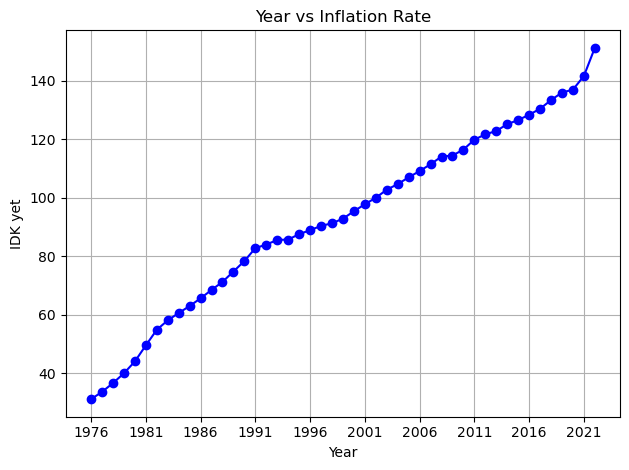

In [15]:
# Extract years and rounded average inflation rates from the result
years = list(range(1976, 2022 + 1))  # Adjust the range to match the length of inflation_rates
inflation_rates = [round(rate, 2) for _, rate in average_inflation_list]

# Plot the points for each year versus inflation rates
plt.plot(years, inflation_rates, marker='o', linestyle='-', color='blue')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('IDK yet')
plt.title('Year vs Inflation Rate')

# Show the plot
plt.grid(True)
plt.xticks(range(1976, 2023, 5))
plt.tight_layout()
plt.show()


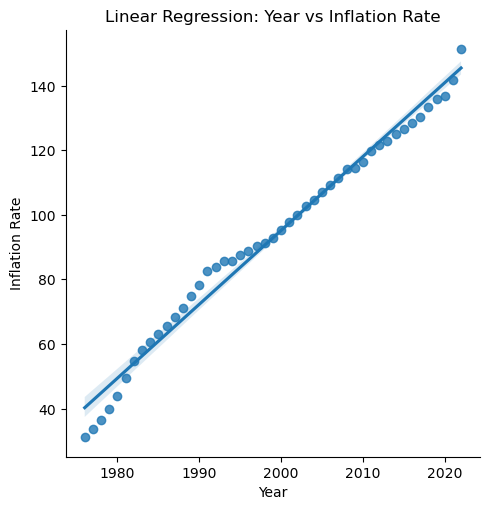

In [16]:
# Convert average inflation rates and years to a DataFrame
df = pd.DataFrame({'Year': range(1976, 2022 + 1),
                   'Inflation_Rate': [rate for _, rate in average_inflation_list]})

sns.lmplot(data=df, x="Year", y="Inflation_Rate")
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.title('Linear Regression: Year vs Inflation Rate')
plt.show()
